# Análisis Exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn

In [2]:
"""Función para detectar columnas repetidas dentro de un df"""
def duplicate_detector(df):
  duplicates = []
  for col in range(df.shape[1]):
      contents = df.iloc[:, col]
      
      for comp in range(col + 1, df.shape[1]):
          if contents.equals(df.iloc[:, comp]):
              duplicates.append(comp)
  duplicates = np.unique(duplicates).tolist()
  return duplicates

Se tiene el siguiente diccionatio de variables:
* id: Llave primaria.
* id2: Repetición de id.
* v1: Luz medida en la unidad lux.
* v2: Temperatura en grados centígrados.
* v3: Fecha en la que fueron tomadas las mediciones, en timestamp (yyyy-MM-dd HH:mm:ss).
* v4: Cantidad de bióxido de carbono (CO2) en ppm.
* v5: Humedad relativa en porcentaje.
* v6: : cociente de humedad, calculado de la temperatura y la humedad relativa, en kg agua-vapor / kg-aire.
* c1: Variable de clasificación binaria. 0- el cuarto NO está ocupado, 1- el cuarto está ocupado.

Podemos observar que las variables v3 y c1 son variables que no son númericas, v3 es un datetime y c1 es una variable categorica por lo cuál es recomendable guardarla como string para que no sea tomada como variable númerica y afecte el modelaje

In [3]:
path_01 = "/Users/jesusarredondo/Documents/VINKOS/info_01.csv"
df_01 = pd.read_csv(path_01,infer_datetime_format=True)

In [4]:
df_01.head(5)

,id,id2,v4,v5,v6
0,1,1,721.2,27.3,0.004793
1,1,1,721.2,27.3,0.004793
2,2,2,714.0,27.3,0.004783
3,2,2,714.0,27.3,0.004783
4,3,3,713.5,27.2,0.004779


In [5]:
df_01.shape

(17286, 5)

Podemos ver que para la info_1 se tiene un entrada de 17286 datos con 5 variables. Donde se tiene que el id2 no aporta mucho ya que es la copia del id. Por lo cual hay que comprobar si de verdad son los mismo datos y si es asi elminar la columna ya que no nos aporta nada

In [6]:
(df_01["id"]==df_01["id2"]).value_counts() #Comprobamos si el id y id2 es el mismo

True    17286
dtype: int64

In [7]:
duplicates = duplicate_detector(df_01)

In [8]:
df_01 = df_01.drop(df_01.columns[duplicates],axis=1) #Eliminamos la columna repetida

In [9]:
df_01

,id,v4,v5,v6
0,1,721.2,27.3,0.004793
1,1,721.2,27.3,0.004793
2,2,714.0,27.3,0.004783
3,2,714.0,27.3,0.004783
4,3,713.5,27.2,0.004779
...,...,...,...,...
17281,5411,423.3,30.8,0.004235
17282,6547,463.0,26.1,0.003606
17283,1806,445.0,21.2,0.003104
17284,5606,420.2,26.3,0.003830


In [10]:
df_01.shape

(17286, 4)

Una vez que eliminamos esa columna, podemos ver que nos quedan la misma cantidad de datos o renglones (17286) y solo cuatro variables. Ahora se procede a realizar el mismo procedimiento para el segundo dataframe "info_2".

In [11]:
path_02 = "/Users/jesusarredondo/Documents/VINKOS/info_02.csv"
df_02 = pd.read_csv(path_02, infer_datetime_format=True)

In [12]:
df_02.head(5)

,id,id2,v1,c1,v2,v3
0,1,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,3,426.0,1,23.1,2015-02-04 17:53:00


In [13]:
aux = df_02.drop_duplicates(subset=["id"])

In [14]:
aux

,id,id2,v1,c1,v2,v3
0,1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,3,426.0,1,23.1,2015-02-04 17:53:00
6,4,4,426.0,1,23.1,2015-02-04 17:54:00
8,5,5,426.0,1,23.1,2015-02-04 17:55:00
...,...,...,...,...,...,...
16276,8139,8139,433.0,1,21.1,2015-02-10 09:29:00
16278,8140,8140,433.0,1,21.1,2015-02-10 09:29:59
16280,8141,8141,433.0,1,21.1,2015-02-10 09:30:59
16282,8142,8142,433.0,1,21.1,2015-02-10 09:32:00


In [15]:
df_02.shape

(17286, 6)

In [16]:
(df_02["id"]==df_02["id2"]).value_counts()

True    17286
dtype: int64

In [17]:
duplicates = duplicate_detector(df_02)

In [18]:
df_02 = df_02.drop(df_02.columns[duplicates],axis=1)

In [19]:
df_02

,id,v1,c1,v2,v3
0,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,426.0,1,23.1,2015-02-04 17:53:00
...,...,...,...,...,...
17281,5411,65.7,0,19.2,NaN
17282,6547,0.0,0,19.3,NaN
17283,1806,0.0,0,20.2,NaN
17284,5606,58.8,0,20.1,NaN


Una vez que tenemos los dos dataframes sin el id2, debemos comprobar que tengan las mismas entradas de id para poder juntar las tablas en una sola ya que esto nos permitirá realizar un mejor análisis estadístico.

In [20]:
(df_01["id"] == df_02["id"]).value_counts() #Comprobamos que df_01 y df_02 tengan la misma cantidad de datos

True    17286
Name: id, dtype: int64

In [21]:
df = df_02.join(df_01.set_index('id'),on = 'id') #Unimos las dos tablas en base al id, salen con datos repetidos

In [22]:
df

,id,v1,c1,v2,v3,v4,v5,v6
0,1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793
0,1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793
1,1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793
1,1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793
2,2,429.5,1,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783
...,...,...,...,...,...,...,...,...
17284,5606,58.8,0,20.1,NaN,420.2,26.3,0.003830
17284,5606,58.8,0,20.1,NaN,420.2,26.3,0.003830
17285,3689,0.0,0,19.6,NaN,449.0,19.3,0.002729
17285,3689,0.0,0,19.6,NaN,449.0,19.3,0.002729


Ahora que ya tenemos las tablas unidas es necesario eliminar los datos repetidos que resultaron del merge, así como eliminar los id repetidos ya que son unicos.

In [23]:
"""Eliminamos la data repetida en la nueva dataframe"""
df = df.drop_duplicates() #Eliminamos renglones iguales
df = df.reset_index(drop=True)
df = df.drop_duplicates(subset=['id']) # Eliminamos datos con el mismo id
df = df.reset_index(drop=True)

In [24]:
"""Covertimos el id en el indice de nuestro dataframe final"""
df.index = df['id']
df = df.drop(columns = ['id'])
df

,v1,c1,v2,v3,v4,v5,v6
id,,,,,,,
1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793
2,429.5,1,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783
3,426.0,1,23.1,2015-02-04 17:53:00,713.5,27.2,0.004779
4,426.0,1,23.1,2015-02-04 17:54:00,708.2,27.2,0.004772
5,426.0,1,23.1,2015-02-04 17:55:00,704.5,27.2,0.004757
...,...,...,...,...,...,...,...
8139,433.0,1,21.1,2015-02-10 09:29:00,787.2,36.1,0.005579
8140,433.0,1,21.1,2015-02-10 09:29:59,789.5,36.0,0.005563
8141,433.0,1,21.1,2015-02-10 09:30:59,798.5,36.1,0.005596


Ahora que tenemos nuestra data sin repetición, es necesario ver la naturaleza de las variables y en dado caso cambiarla sobre todo en la v3 y c1 como se menciono inicialmente

In [25]:
df.dtypes

v1    float64
c1      int64
v2    float64
v3     object
v4    float64
v5    float64
v6    float64
dtype: object

Como se cumplio lo que se penso en un inicio, va a ser necesario cambiar la naturaleza de los datos de las variables c1 a un string y v3 a un date time.

In [26]:
df["category"]= df["c1"].astype(str)
df

,v1,c1,v2,v3,v4,v5,v6,category
id,,,,,,,,
1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793,1
2,429.5,1,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783,1
3,426.0,1,23.1,2015-02-04 17:53:00,713.5,27.2,0.004779,1
4,426.0,1,23.1,2015-02-04 17:54:00,708.2,27.2,0.004772,1
5,426.0,1,23.1,2015-02-04 17:55:00,704.5,27.2,0.004757,1
...,...,...,...,...,...,...,...,...
8139,433.0,1,21.1,2015-02-10 09:29:00,787.2,36.1,0.005579,1
8140,433.0,1,21.1,2015-02-10 09:29:59,789.5,36.0,0.005563,1
8141,433.0,1,21.1,2015-02-10 09:30:59,798.5,36.1,0.005596,1


In [27]:
df["v3"]=pd.to_datetime(df['v3'])

In [28]:
df.dtypes

v1                 float64
c1                   int64
v2                 float64
v3          datetime64[ns]
v4                 float64
v5                 float64
v6                 float64
category            object
dtype: object

In [29]:
type(df["v3"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
df.describe()

,v1,c1,v2,v4,v5,v6
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,119.519403,0.212330,20.619821,606.546359,25.731229,0.003863
std,194.755878,0.408982,1.017464,314.320229,5.531708,0.000852
min,0.000000,0.000000,19.000000,412.800000,16.700000,0.002674
25%,0.000000,0.000000,19.700000,439.000000,20.200000,0.003078
50%,0.000000,0.000000,20.400000,453.500000,26.200000,0.003801
75%,256.400000,0.000000,21.400000,638.850000,30.500000,0.004352
max,1546.300000,1.000000,23.200000,2028.500000,39.100000,0.006476


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   v1        8143 non-null   float64       
 1   c1        8143 non-null   int64         
 2   v2        8143 non-null   float64       
 3   v3        8143 non-null   datetime64[ns]
 4   v4        8143 non-null   float64       
 5   v5        8143 non-null   float64       
 6   v6        8143 non-null   float64       
 7   category  8143 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 830.6+ KB


In [32]:
df_02[df_02["id"]==3689]

,id,v1,c1,v2,v3
7376,3689,0.0,0,19.6,2015-02-07 07:19:00
7377,3689,0.0,0,19.6,2015-02-07 07:19:00
17285,3689,0.0,0,19.6,NaN


In [33]:
df.duplicated().value_counts()

False    8143
dtype: int64

Podemos ver que no existen ya datos duplicados en el datafrane final.

In [34]:
df.iloc[3689]

v1                          0.0
c1                            0
v2                         19.6
v3          2015-02-07 07:20:00
v4                        450.0
v5                         19.3
v6                     0.002713
category                      0
Name: 3690, dtype: object

In [35]:
pd.DataFrame(df.index).duplicated().value_counts()

False    8143
dtype: int64

Ahora veamos si hay datos nulos

In [36]:
df.isnull().value_counts()

v1     c1     v2     v3     v4     v5     v6     category
False  False  False  False  False  False  False  False       8143
dtype: int64

In [37]:
df.isna().value_counts()

v1     c1     v2     v3     v4     v5     v6     category
False  False  False  False  False  False  False  False       8143
dtype: int64

Con lo anterior vemos que no se tienen datos nulos, vacios ni repetidos por lo cual podemos realizar un análisis estadistico de los datos

In [38]:
df.describe()

,v1,c1,v2,v4,v5,v6
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,119.519403,0.212330,20.619821,606.546359,25.731229,0.003863
std,194.755878,0.408982,1.017464,314.320229,5.531708,0.000852
min,0.000000,0.000000,19.000000,412.800000,16.700000,0.002674
25%,0.000000,0.000000,19.700000,439.000000,20.200000,0.003078
50%,0.000000,0.000000,20.400000,453.500000,26.200000,0.003801
75%,256.400000,0.000000,21.400000,638.850000,30.500000,0.004352
max,1546.300000,1.000000,23.200000,2028.500000,39.100000,0.006476


Veamos como se comportan las variables siguiendo el comportamiento en base al id registrado

<AxesSubplot:xlabel='id'>

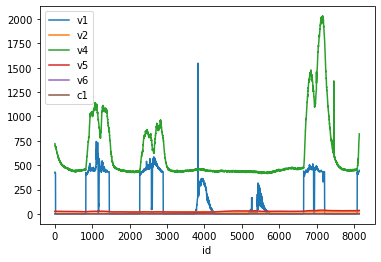

In [52]:
df[['v1','v2','v4','v5','v6','c1']].plot()

Algo de lo que podemos darnos cuenta es que las variable v4 aumenta en ciertos ciclos conforme el id aumenta, ahora veamos como se comporta siguiendo una serie de tiempo según los dias visto

In [40]:
df_serie = df.copy()

In [41]:
df_serie

,v1,c1,v2,v3,v4,v5,v6,category
id,,,,,,,,
1,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793,1
2,429.5,1,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783,1
3,426.0,1,23.1,2015-02-04 17:53:00,713.5,27.2,0.004779,1
4,426.0,1,23.1,2015-02-04 17:54:00,708.2,27.2,0.004772,1
5,426.0,1,23.1,2015-02-04 17:55:00,704.5,27.2,0.004757,1
...,...,...,...,...,...,...,...,...
8139,433.0,1,21.1,2015-02-10 09:29:00,787.2,36.1,0.005579,1
8140,433.0,1,21.1,2015-02-10 09:29:59,789.5,36.0,0.005563,1
8141,433.0,1,21.1,2015-02-10 09:30:59,798.5,36.1,0.005596,1


In [42]:
df_serie.index = df_serie["v3"]

In [43]:
df_serie

,v1,c1,v2,v3,v4,v5,v6,category
v3,,,,,,,,
2015-02-04 17:51:00,426.0,1,23.2,2015-02-04 17:51:00,721.2,27.3,0.004793,1
2015-02-04 17:51:59,429.5,1,23.1,2015-02-04 17:51:59,714.0,27.3,0.004783,1
2015-02-04 17:53:00,426.0,1,23.1,2015-02-04 17:53:00,713.5,27.2,0.004779,1
2015-02-04 17:54:00,426.0,1,23.1,2015-02-04 17:54:00,708.2,27.2,0.004772,1
2015-02-04 17:55:00,426.0,1,23.1,2015-02-04 17:55:00,704.5,27.2,0.004757,1
...,...,...,...,...,...,...,...,...
2015-02-10 09:29:00,433.0,1,21.1,2015-02-10 09:29:00,787.2,36.1,0.005579,1
2015-02-10 09:29:59,433.0,1,21.1,2015-02-10 09:29:59,789.5,36.0,0.005563,1
2015-02-10 09:30:59,433.0,1,21.1,2015-02-10 09:30:59,798.5,36.1,0.005596,1


In [44]:
df_serie = df_serie.drop(["v3"],axis=1)

In [45]:
df_serie

,v1,c1,v2,v4,v5,v6,category
v3,,,,,,,
2015-02-04 17:51:00,426.0,1,23.2,721.2,27.3,0.004793,1
2015-02-04 17:51:59,429.5,1,23.1,714.0,27.3,0.004783,1
2015-02-04 17:53:00,426.0,1,23.1,713.5,27.2,0.004779,1
2015-02-04 17:54:00,426.0,1,23.1,708.2,27.2,0.004772,1
2015-02-04 17:55:00,426.0,1,23.1,704.5,27.2,0.004757,1
...,...,...,...,...,...,...,...
2015-02-10 09:29:00,433.0,1,21.1,787.2,36.1,0.005579,1
2015-02-10 09:29:59,433.0,1,21.1,789.5,36.0,0.005563,1
2015-02-10 09:30:59,433.0,1,21.1,798.5,36.1,0.005596,1


<AxesSubplot:xlabel='v3'>

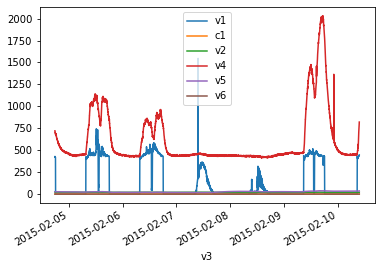

In [51]:
df_serie.plot()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c1', ylabel='count'>

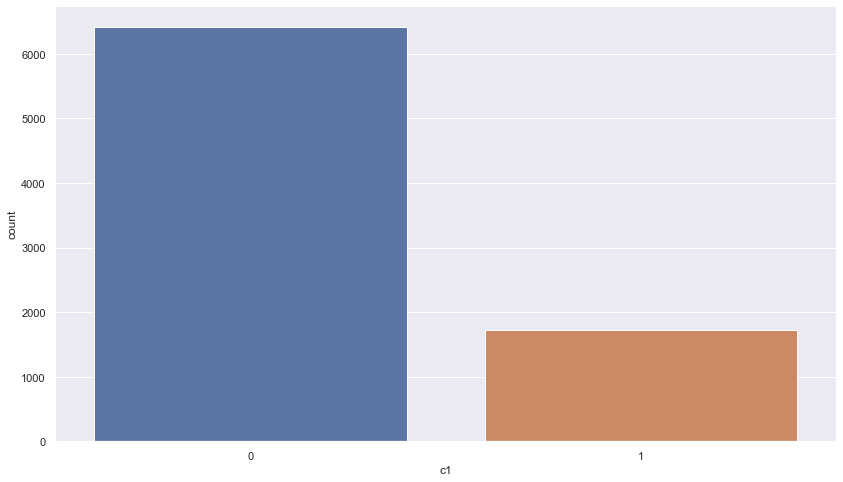

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df['c1'])

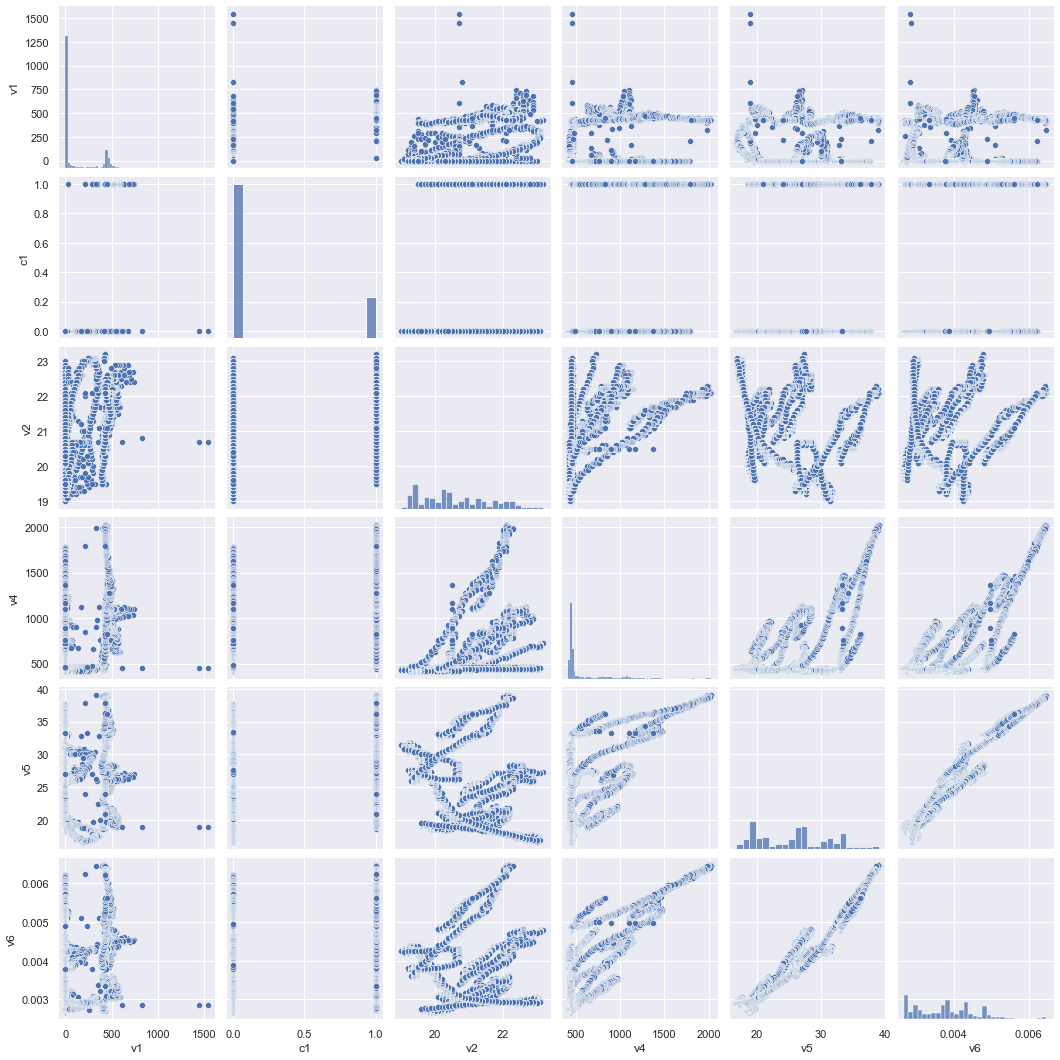

In [55]:
sns.pairplot(df)

<AxesSubplot:>

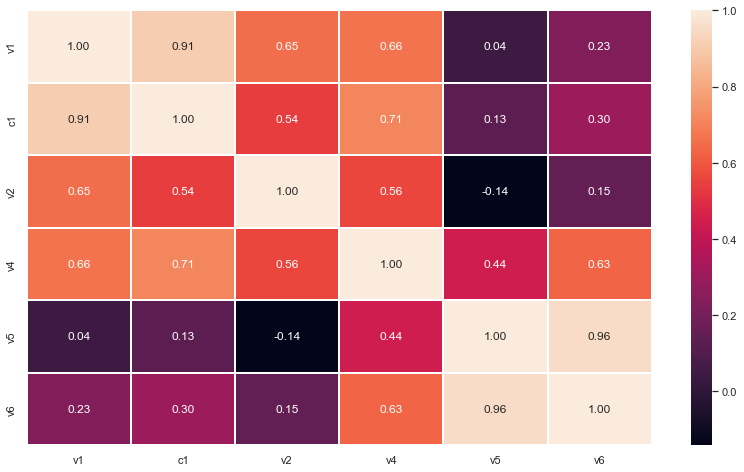

In [56]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [59]:
columns = list(df.columns)

In [61]:
columns[:-1]

['v1', 'c1', 'v2', 'v3', 'v4', 'v5', 'v6']

In [62]:
columns = columns[:-1]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'v1')

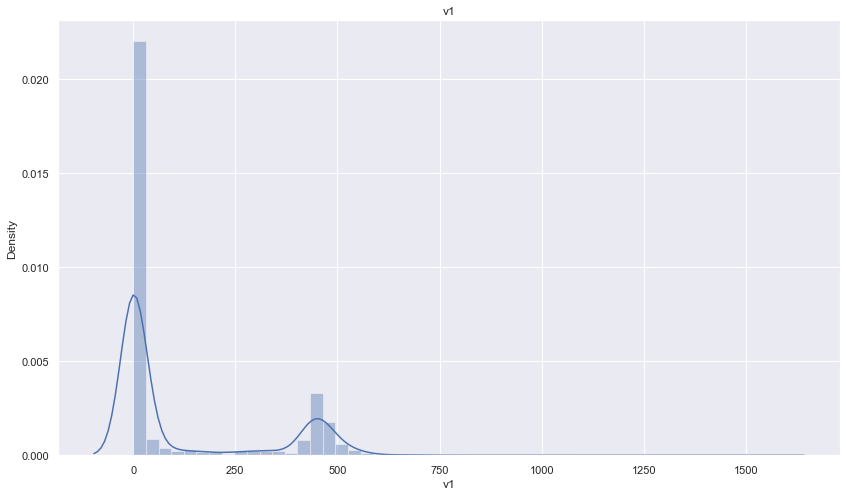

In [68]:
sns.distplot(df["v1"]).set_title("v1")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'v2')

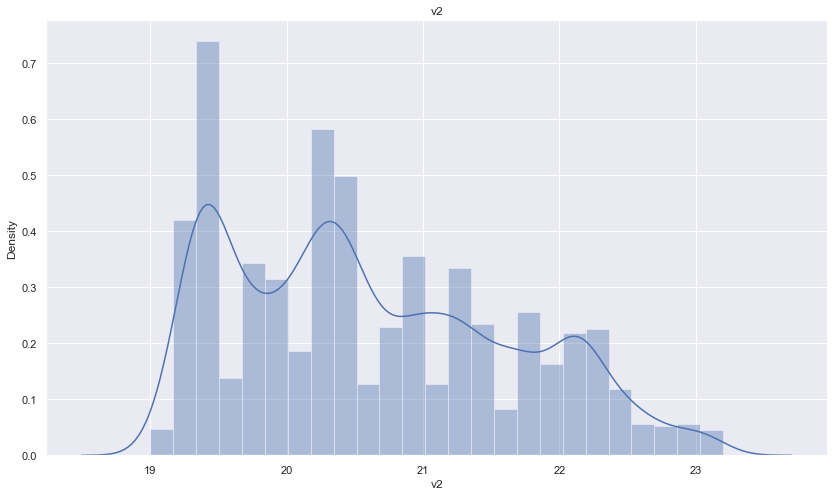

In [69]:
sns.distplot(df["v2"]).set_title("v2")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'v4')

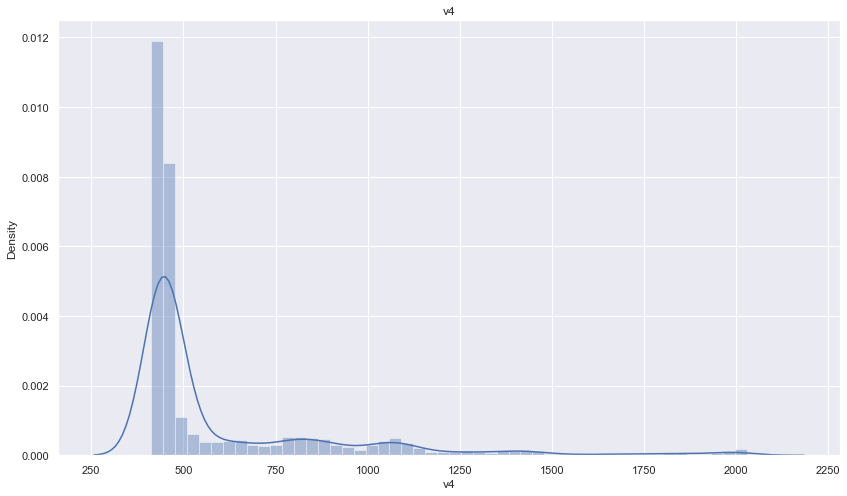

In [70]:
sns.distplot(df["v4"]).set_title("v4")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'v5')

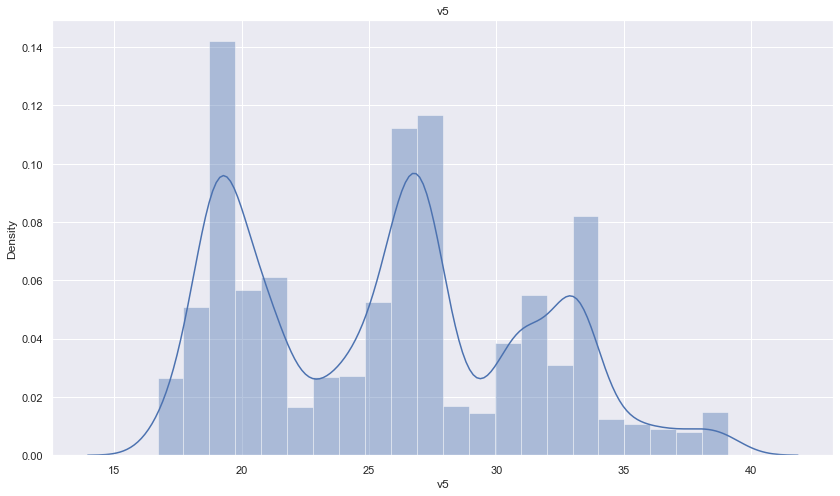

In [71]:
sns.distplot(df["v5"]).set_title("v5")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'v6')

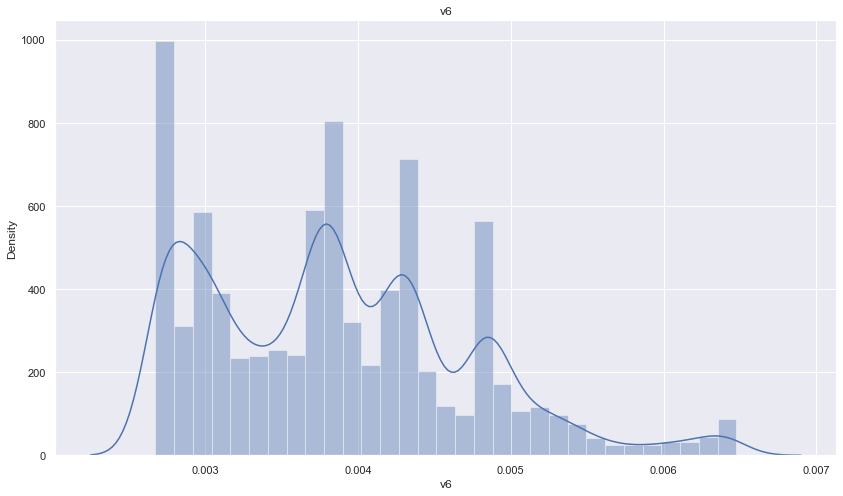

In [72]:
sns.distplot(df["v6"]).set_title("v6")

Text(0.5, 1.0, 'v1')

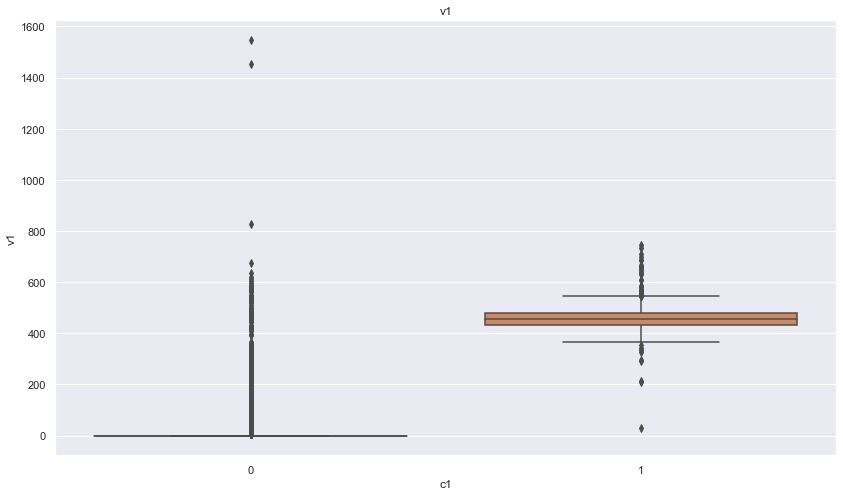

In [86]:
sns.boxplot(x='c1', y='v1', data = df).set_title("v1")

Text(0.5, 1.0, 'v2')

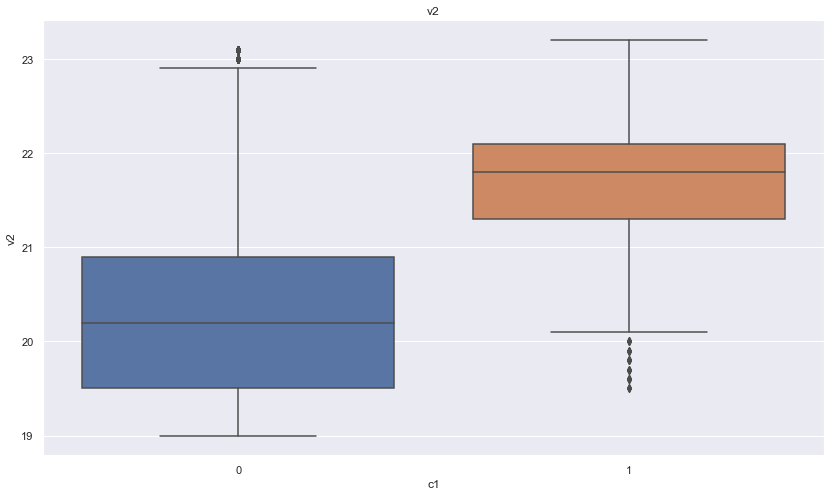

In [87]:
sns.boxplot(x='c1', y='v2', data = df).set_title("v2")

Text(0.5, 1.0, 'v4')

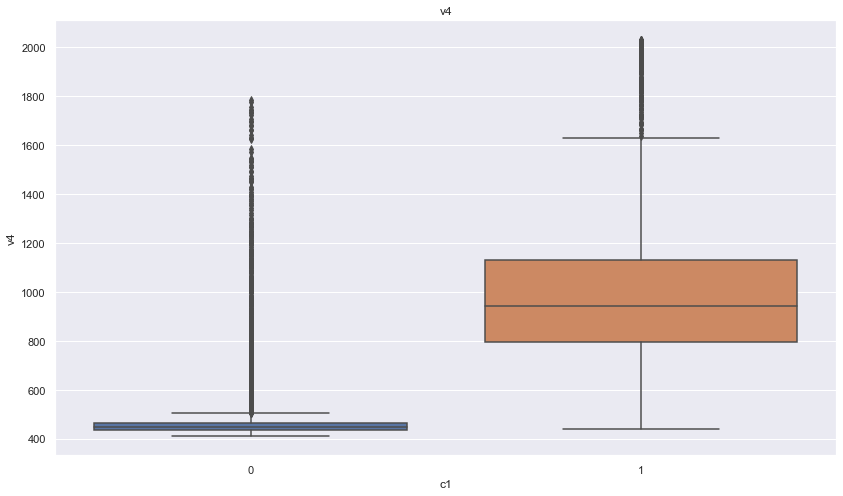

In [88]:
sns.boxplot(x='c1', y='v4', data = df).set_title("v4")

Text(0.5, 1.0, 'v5')

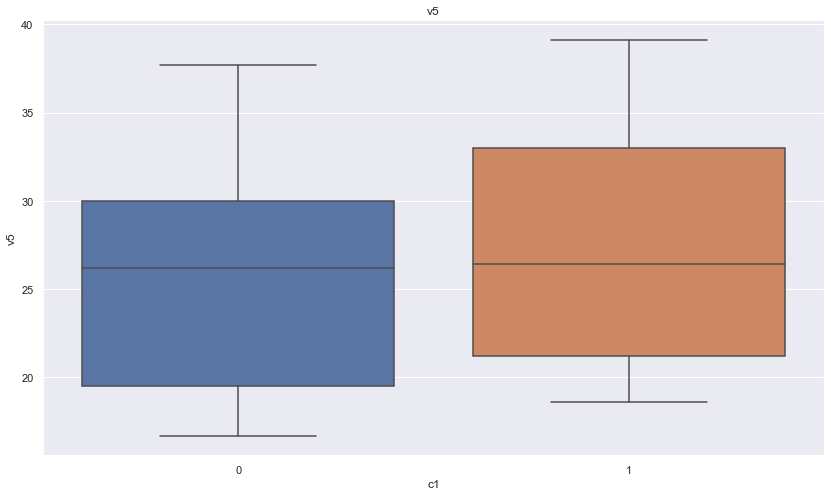

In [89]:
sns.boxplot(x='c1', y='v5', data = df).set_title("v5")

Text(0.5, 1.0, 'v6')

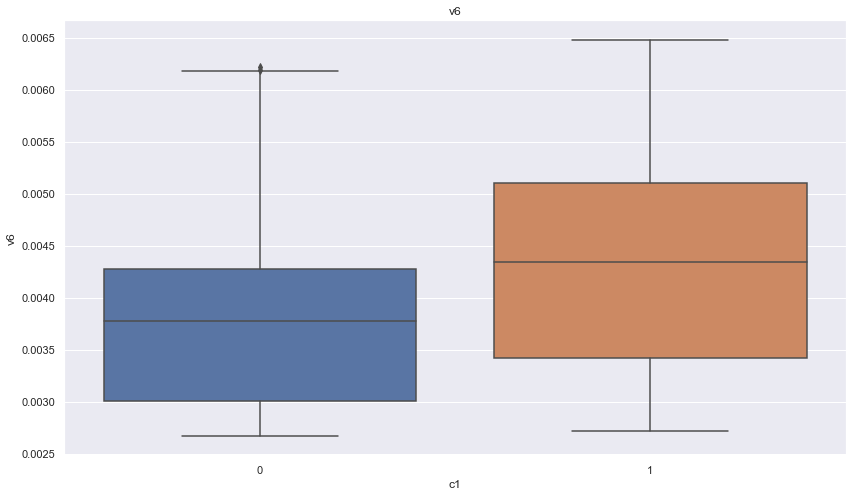

In [90]:
sns.boxplot(x='c1', y='v6', data = df).set_title("v6")

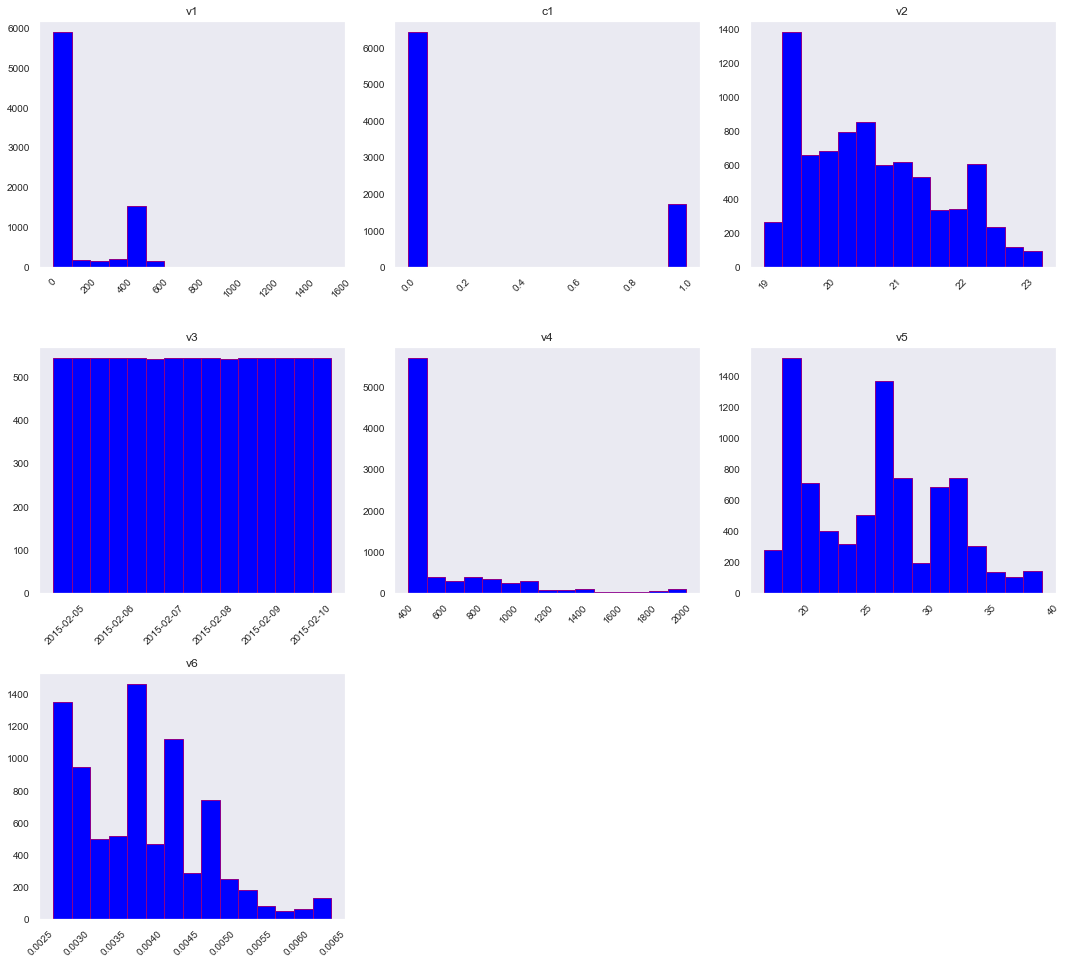

In [93]:
fig = df.hist(bins=15, color='blue', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))